<h5 align="center">Praneeth PENUGANTI - Meri MARTIROSYAN - Charbel EID</h5> 

<h1 align="center">
2023_7MPAML_01 - Advanced machine learning models</h1>
<h2 align="center">Prof. Jean Sevinien</h2>


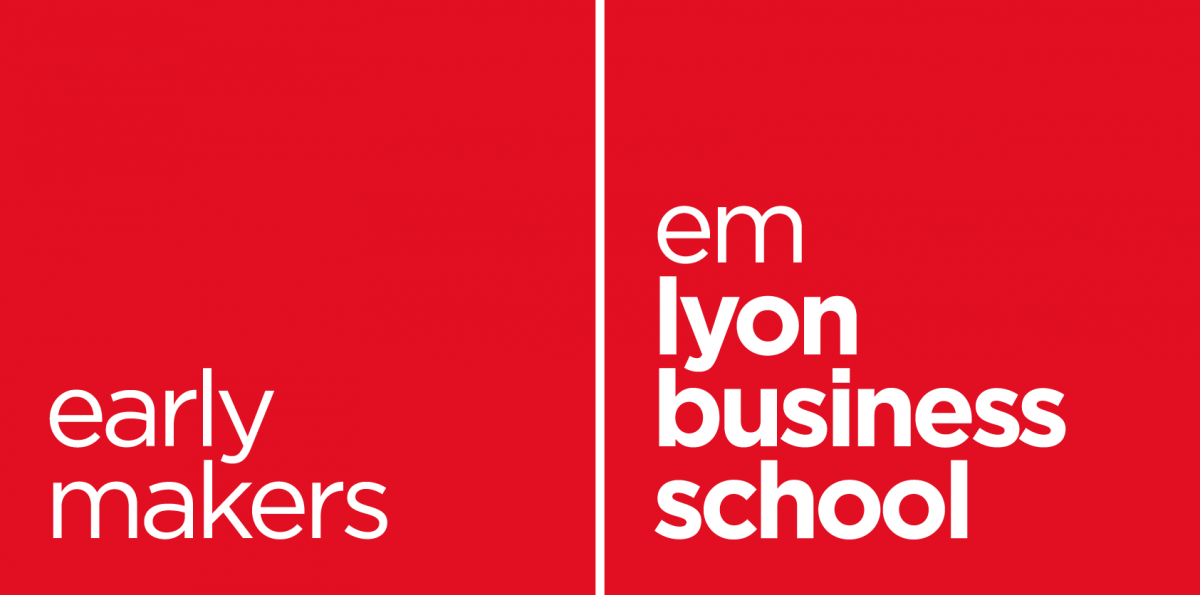


<h3 align="center">Group Project: Rossmann Store Sales Prediction</h3> 


## Introduction

The marketing data of a pharmaceutical company, Rossmann, is the business setting being discussed, where its data has been offered as a subject of sales prediction. This addresses the issues that retailers confront around the world, as there are numerous elements that influence the sales. Here is a look into few of these aspects to see how they might better the effect on Rossman’s sales.


The model build is based on the Linear Regression and Random Forest algorithm. The root mean squared error is used to determine the accuracy of a forecast. The model is also evaluated based on the level of insight provided by the visualizations created, in addition to the RMSE value. The R-Squared values aid in the evaluation of the model created.


The dataset is found at: https://www.kaggle.com/c/rossmann-store-sales

## Rossman Sales


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from utils import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
import catboost
from catboost import CatBoostClassifier, CatBoostRegressor, Pool, cv


## Data Preparation

Data preprocessing/ Preparation aids in the transformation of unstructured data (raw data) into a usable format. It is critical that the data be complete and error-free in order to create reliable forecasts using algorithms.

In [2]:
#Reading the store data
store = pd.read_csv("store.csv")
store.sample(5)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1062,1063,a,c,6250.0,NaN,NaN,0,NaN,NaN,NaN
514,515,d,c,11260.0,NaN,NaN,1,9.0,2011.0,"Feb,May,Aug,Nov"
539,540,d,c,810.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1026,1027,a,c,190.0,6.0,2008.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
609,610,a,a,660.0,1.0,2007.0,0,NaN,NaN,NaN


In [3]:
store.Store.nunique()

1115

In [4]:
store.shape

(1115, 10)

In [5]:
#Reading the train data
train = pd.read_csv('train.csv')
train.head(5)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train.Store.nunique()

1115

In [7]:
#Reading the test data
test = pd.read_csv('test.csv')
test.head(5)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
# Summary of all datasets
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


## Data Cleaning 


First step in Data Cleaning is to identify the number of data anomalies and other inherent problems and its solutions


The attributes are checked for null values in the columns of all our dataset. (Done with isnull().sum()).

In [11]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

‘CompetitionDistance’ is a normal number distribution with low chances of outliers as a result, replacing the empty values with the Mean seems logical.


In [14]:
#Updating null values
#CompetitionDistance has 3 empty values, substituting with mean
mean_CompDist = store['CompetitionDistance'].mean()
store.update(store['CompetitionDistance'].fillna(value=mean_CompDist,inplace=True))
print('No. of null values in CompetetionDistance: ',store['CompetitionDistance'].isna().sum())

No. of null values in CompetetionDistance:  0


In [15]:
#CompetitionSinceMonth and Year have empty values, fill with mode (most recurring month and year)
Month_mode = store['CompetitionOpenSinceMonth'].mode()[0]
Year_mode = store['CompetitionOpenSinceYear'].mode()[0]
store.update(store['CompetitionOpenSinceMonth'].fillna(value=Month_mode,inplace=True))
store.update(store['CompetitionOpenSinceYear'].fillna(value=Year_mode,inplace=True))
print('No. of null values in CompetitionOpenSinceMonth: ',store['CompetitionOpenSinceMonth'].isna().sum())
print('No. of null values in CompetitionOpenSinceYear: ',store['CompetitionOpenSinceYear'].isna().sum())


No. of null values in CompetitionOpenSinceMonth:  0
No. of null values in CompetitionOpenSinceYear:  0


When it comes to ‘Promo2SinceWeek’ and ‘Promo2SinceYear’, it's obvious that if the ‘Promo2’ is 0, there would be no ‘Promo2SinceWeek’ and ‘Promo2SinceYear’, thus we substitute them with 0 instead.


In [16]:
# substitute with 0 when Promo is 0
# Intervals in string format so putting in correct format
store["Promo2SinceWeek"].loc[store["Promo2"]==0]=0
store["Promo2SinceYear"].loc[store["Promo2"]==0]=0
store["PromoInterval"].loc[store["Promo2"]==0]="0"
print('No. of null values in Promo2SinceWeek: ',store['Promo2SinceWeek'].isna().sum())
print('No. of null values in Promo2SinceYear: ',store['Promo2SinceYear'].isna().sum())


No. of null values in Promo2SinceWeek:  0
No. of null values in Promo2SinceYear:  0


In [17]:
# Test, update with 1 and 0
test.update(test['Open'].fillna(value = 1, inplace = True))
print('No. of null values in Open: ',test['Open'].isna().sum())

No. of null values in Open:  0


Identifying mismatched data types in both datasets is the next step in the cleaning process. When gathering information from diverse sources, it may appear in a variety of formats. It's essential to guarantee that data in columns are of the same data type.


We start by making sure that all the data columns have the same format and data types.


In [18]:
#Unique values in datasets
# CompetitionDistance is removed for now, as it has a series of distinct values in Store
str_cols = list(store.columns)
str_cols.remove("CompetitionDistance")
for i in str_cols:
    print(i,"-",store[i].unique())


Store - [   1    2    3 ... 1113 1114 1115]
StoreType - ['c' 'a' 'd' 'b']
Assortment - ['a' 'c' 'b']
CompetitionOpenSinceMonth - [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear - [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 - [0 1]
Promo2SinceWeek - [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear - [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval - ['0' 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [19]:
# Date and CompetitionDistance have various distinct value
trn_cols = list(train.columns)
trn_cols.remove("Date")
for i in trn_cols:
    print("Values in column",i,"-",train[i].unique())


Values in column Store - [   1    2    3 ... 1113 1114 1115]
Values in column DayOfWeek - [5 4 3 2 1 7 6]
Values in column Sales - [ 5263  6064  8314 ...   660 17815 23303]
Values in column Customers - [ 555  625  821 ... 3900   36 4065]
Values in column Open - [1 0]
Values in column Promo - [1 0]
Values in column StateHoliday - ['0' 'a' 'b' 'c' 0]
Values in column SchoolHoliday - [1 0]


In [20]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
train["StateHoliday"].loc[train["StateHoliday"]==0]="0"
print(train["StateHoliday"].unique())

['0' 'a' 'b' 'c']


## Data transformation

The data is examined further to see if any of the attributes can be used to create new
variables or can be combined to make new attribute.


For example, the 'Date' attribute in the Train dataset is a continuous numeric distribution that may or may not be relevant when predicting. However, if we divide it into Month and Year, we may use it for data analysis.

In [21]:
train['Date'] = pd.to_datetime(train['Date'])

In [22]:
add_datepart(train,"Date")

In [23]:
test['Date'] = pd.to_datetime(test['Date'])

In [24]:
add_datepart(test,"Date")

It is preferable if all the variables we are dealing with are of the same data type, as this makes encoding with them easier.

In [25]:
# Convert all variables into suitable datatypes
store["CompetitionOpenSinceMonth"]=store["CompetitionOpenSinceMonth"].astype(int)
store["CompetitionOpenSinceYear"]=store["CompetitionOpenSinceYear"].astype(int)
store["Promo2SinceWeek"]=store["Promo2SinceWeek"].astype(int)
store["Promo2SinceYear"]=store["Promo2SinceYear"].astype(int)
store["Promo2"] = store["Promo2"].astype(str)

train["StateHoliday"] = train["StateHoliday"].astype(str)
train["SchoolHoliday"] = train["SchoolHoliday"].astype(str)
train["Promo"] = train["Promo"].astype(str)

test["SchoolHoliday"] = test["SchoolHoliday"].astype(str)
test["Promo"] = test["Promo"].astype(str)


## Data Integration

Once we’ve got Store, Train and Test datasets that are devoid of null values and abnormalities, the datasets are merged.


In [26]:
# Merge Store and Train
total_data = pd.merge(store,train,on = 'Store')
total_data.head(5)
total_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1017209 non-null  float64
 4   CompetitionOpenSinceMonth  1017209 non-null  int64  
 5   CompetitionOpenSinceYear   1017209 non-null  int64  
 6   Promo2                     1017209 non-null  object 
 7   Promo2SinceWeek            1017209 non-null  int64  
 8   Promo2SinceYear            1017209 non-null  int64  
 9   PromoInterval              1017209 non-null  object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Sales                      1017209 non-null  int64  
 12  Customers                  1017209 non-null  int64  
 13  Open        

In [27]:
# Drop unnecessary columns
total_data =  total_data.drop(["Promo2SinceWeek","Promo2SinceYear"],axis=1)
total_data.head().T

,0,1,2,3,4
Store,1,1,1,1,1
StoreType,c,c,c,c,c
Assortment,a,a,a,a,a
CompetitionDistance,1270.0,1270.0,1270.0,1270.0,1270.0
CompetitionOpenSinceMonth,9,9,9,9,9
CompetitionOpenSinceYear,2008,2008,2008,2008,2008
Promo2,0,0,0,0,0
PromoInterval,0,0,0,0,0
DayOfWeek,5,4,3,2,1
Sales,5263,5020,4782,5011,6102


In [28]:
# Merge Store and Test
store_test = pd.merge(store,test,on = 'Store')
store_test.head(5)
store_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   StoreType                  41088 non-null  object 
 2   Assortment                 41088 non-null  object 
 3   CompetitionDistance        41088 non-null  float64
 4   CompetitionOpenSinceMonth  41088 non-null  int64  
 5   CompetitionOpenSinceYear   41088 non-null  int64  
 6   Promo2                     41088 non-null  object 
 7   Promo2SinceWeek            41088 non-null  int64  
 8   Promo2SinceYear            41088 non-null  int64  
 9   PromoInterval              41088 non-null  object 
 10  Id                         41088 non-null  int64  
 11  DayOfWeek                  41088 non-null  int64  
 12  Open                       41088 non-null  float64
 13  Promo                      41088 non-null  obj

## Data Visualization 

Data presented in a pictorial or graphical manner helps in the detection of any previously undetected correlations or impacts that an attribute may or may not have on sales.


<AxesSubplot: title={'center': 'Sales'}, xlabel='Year'>

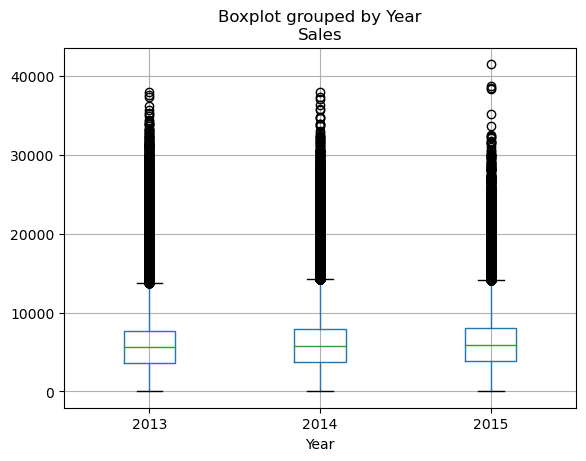

In [29]:
# Year vs Sales
total_data.boxplot(column="Sales",by="Year")


<AxesSubplot: title={'center': 'Sales'}, xlabel='StoreType'>

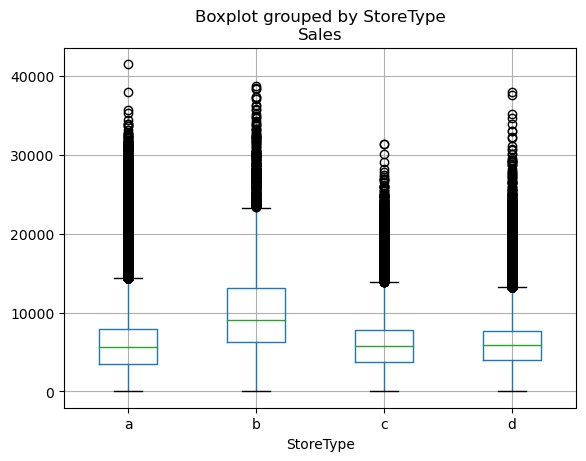

In [30]:
total_data.boxplot(column="Sales",by="StoreType")

The sales for each of the three years have been charted, and many outliers have been identified. These cannot be removed arbitrarily, as this may lead to bias in prediction.


We can observe that during promotions, sales increase significantly, indicating that promotions have a favorable impact on sales.
Let us dig deeper and see if there is an increase of customers each year with the implementation of Promos.

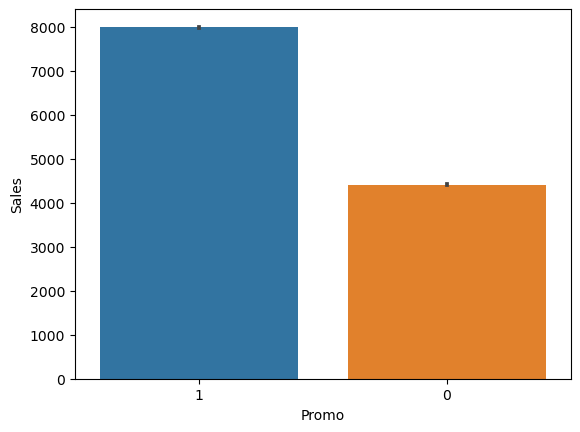

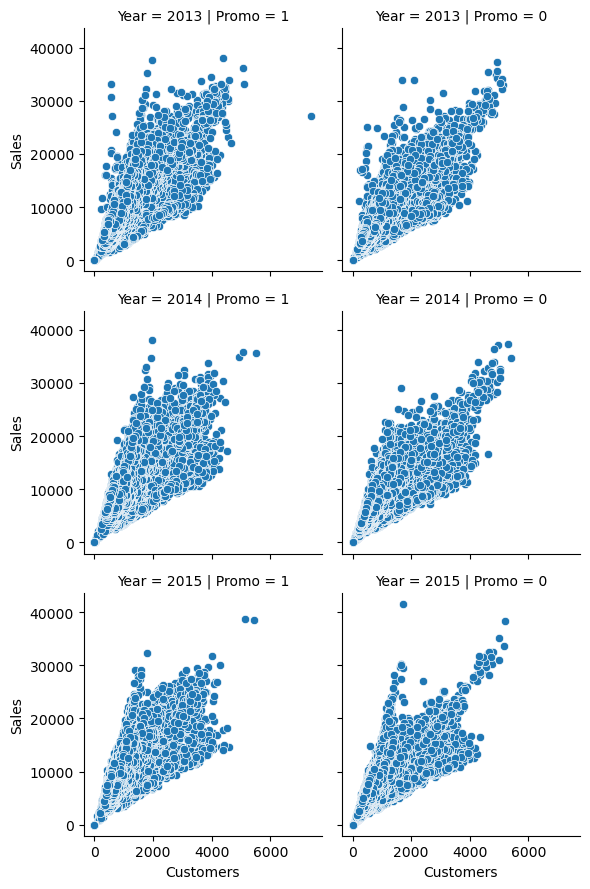

In [31]:
# Promo vs Sales
sns.barplot(x='Promo',y="Sales",data=total_data)
plt.show()
# Customers vs Sales w.r.t Promo
m = sns.FacetGrid(total_data, col='Promo', row = 'Year')
m.map(sns.scatterplot,'Customers','Sales')


There indeed seems like an increase in Sales with Promo but there is a tiny dip if seen by each year.


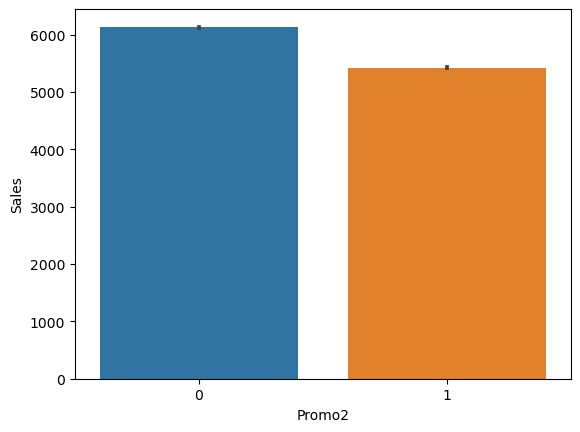

In [32]:
#Promo2 vs Sales
sns.barplot(x='Promo2',y="Sales",data=total_data)
plt.show()


Surprisingly, while Promo2 is active, there is a drop in sales, which decreases its relevancy.


<function matplotlib.pyplot.show(close=None, block=None)>

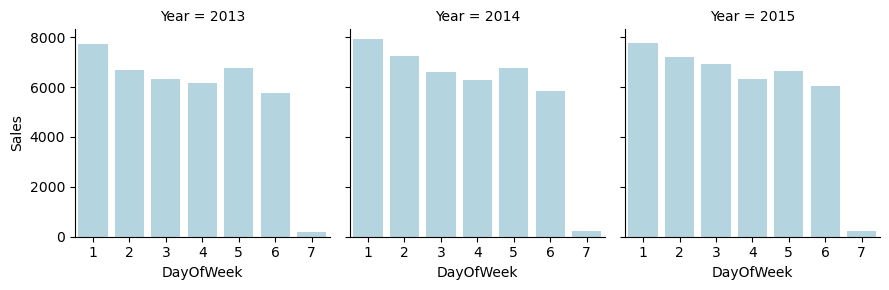

In [33]:
#DayOfWeek vs Sales
m = sns.FacetGrid(total_data, col="Year")
m.map(sns.barplot,"DayOfWeek","Sales", ci=None, color='lightblue')
plt.show


Here, we observe that the Sales each year are highest on Monday (1) followed by Friday (5). Sunday has almost no sales as most stores are closed on Sundays (7).


Also, Sales on Monday may be the result of Sunday being a closed day.

<function matplotlib.pyplot.show(close=None, block=None)>

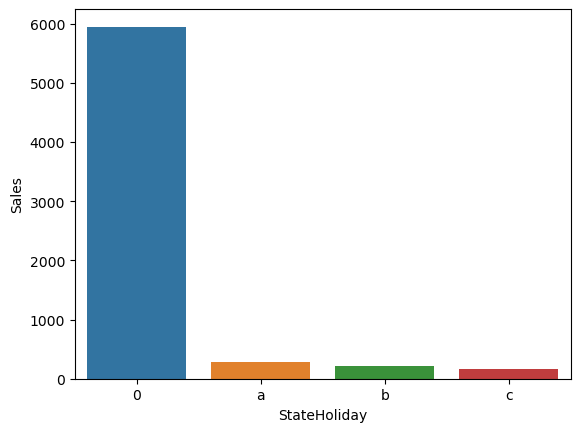

In [34]:
#StateHoliday and SchoolHoliday
sns.barplot(x="StateHoliday",y="Sales",data=total_data,ci=None)
plt.show


We can see that stores of type B has higher number of Sales.

It makes sense that only the open stores should be examined because these are the days when sales occur.

<function matplotlib.pyplot.show(close=None, block=None)>

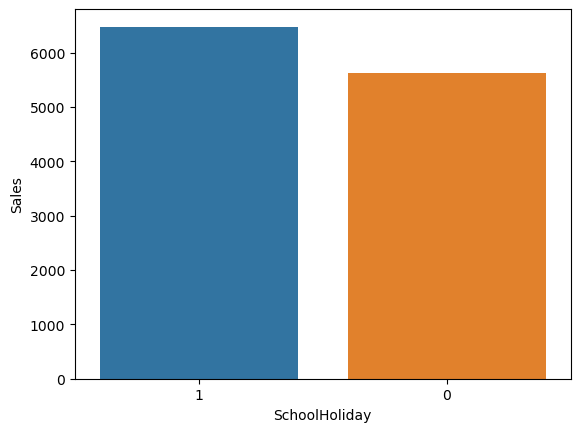

In [35]:
sns.barplot(x="SchoolHoliday",y="Sales",data=total_data,ci=None)
plt.show


During State and School Holidays, we see that most stores are closed. However, it's important to note that the number of stores open during school holidays was higher than the number of stores open during state holidays. Another crucial thing to note is that during the school holidays, stores that were open saw more sales than usual.


In [36]:
# Consider scenerio where the Stores are open in both merged datasets
openstore = total_data[total_data['Open'] == 1]
openStores = openstore.drop(['Open','Customers'],1)
openStores


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval,DayOfWeek,Sales,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,c,a,1270.0,9,2008,0,0,5,5263,...,31,4,212,True,False,False,False,False,False,1438300800
1,1,c,a,1270.0,9,2008,0,0,4,5020,...,30,3,211,False,False,False,False,False,False,1438214400
2,1,c,a,1270.0,9,2008,0,0,3,4782,...,29,2,210,False,False,False,False,False,False,1438128000
3,1,c,a,1270.0,9,2008,0,0,2,5011,...,28,1,209,False,False,False,False,False,False,1438041600
4,1,c,a,1270.0,9,2008,0,0,1,6102,...,27,0,208,False,False,False,False,False,False,1437955200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,d,c,5350.0,9,2013,1,"Mar,Jun,Sept,Dec",1,6905,...,7,0,7,False,False,False,False,False,False,1357516800
1017204,1115,d,c,5350.0,9,2013,1,"Mar,Jun,Sept,Dec",6,4771,...,5,5,5,False,False,False,False,False,False,1357344000
1017205,1115,d,c,5350.0,9,2013,1,"Mar,Jun,Sept,Dec",5,4540,...,4,4,4,False,False,False,False,False,False,1357257600
1017206,1115,d,c,5350.0,9,2013,1,"Mar,Jun,Sept,Dec",4,4297,...,3,3,3,False,False,False,False,False,False,1357171200


In [37]:
opentest = store_test[store_test['Open'] == 1]
openTest = opentest.drop(['Open'],1)
openTest


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,c,a,1270.0,9,2008,0,0,0,0,...,17,3,260,False,False,False,False,False,False,1442448000
1,1,c,a,1270.0,9,2008,0,0,0,0,...,16,2,259,False,False,False,False,False,False,1442361600
2,1,c,a,1270.0,9,2008,0,0,0,0,...,15,1,258,False,False,False,False,False,False,1442275200
3,1,c,a,1270.0,9,2008,0,0,0,0,...,14,0,257,False,False,False,False,False,False,1442188800
5,1,c,a,1270.0,9,2008,0,0,0,0,...,12,5,255,False,False,False,False,False,False,1442016000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41082,1115,d,c,5350.0,9,2013,1,22,2012,"Mar,Jun,Sept,Dec",...,6,3,218,False,False,False,False,False,False,1438819200
41083,1115,d,c,5350.0,9,2013,1,22,2012,"Mar,Jun,Sept,Dec",...,5,2,217,False,False,False,False,False,False,1438732800
41084,1115,d,c,5350.0,9,2013,1,22,2012,"Mar,Jun,Sept,Dec",...,4,1,216,False,False,False,False,False,False,1438646400
41085,1115,d,c,5350.0,9,2013,1,22,2012,"Mar,Jun,Sept,Dec",...,3,0,215,False,False,False,False,False,False,1438560000


## Data Encoding

Choosing the right encoding method –
We have a variety of encoding strategies available, but which one is the best in this situation?

With the data we have now, the attributes are not ordinal, and there are less number of categorical features. This indicates that we should adopt One-Hot Encoding rather than Label Encoding.


One-Hot Encoding is a powerful approach that simply adds features to a categorical feature based on the number of unique values. Each category's unique value is then included as a feature.

In [38]:
#One-Hot Encoding –

X_cat = openStores.copy()
X_cat = openStores.select_dtypes(include=['object'])
X_enc = X_cat.copy()


In [39]:
#ONEHOT ENCODING BLOCK
X_enc = pd.get_dummies(X_enc, columns=['StoreType','Assortment','PromoInterval','StateHoliday','Promo','Promo2'])
encoded = openStores.drop(['StoreType','Assortment','PromoInterval','StateHoliday','Promo','Promo2'],axis=1)
finalData = pd.concat([encoded,X_enc], axis=1)
finalData = finalData.loc[:,~finalData.columns.duplicated()].copy()
finalData.columns



Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'DayOfWeek', 'Sales', 'SchoolHoliday',
       'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Promo_0', 'Promo_1', 'Promo2_0', 'Promo2_1'],
      dtype='object')

With the now-processed data, a histogram plotted against Sales yields a normally distributed plot.


<AxesSubplot: xlabel='Sales', ylabel='Density'>

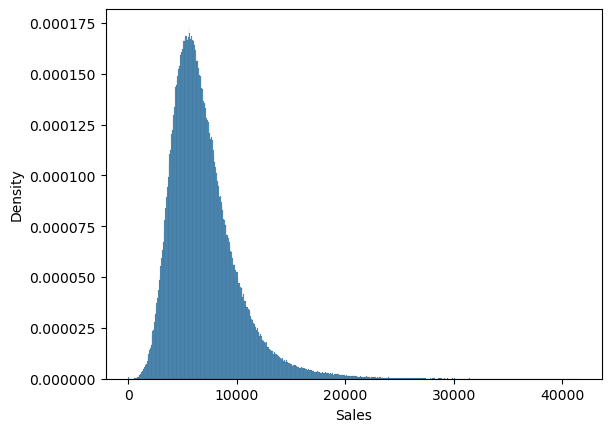

In [40]:
#Distribution of sales 
sns.histplot(finalData['Sales'],stat = 'density')


As the tails are narrower and flatter, it is obvious that the majority of values are concentrated around the mean and have small standard deviations.
We can begin developing the underlying model for prediction now that we have the final data. The following features are considered for the base model:

In [41]:
finalData.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,DayOfWeek,Sales,SchoolHoliday,Year,Month,Week,...,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Promo_0,Promo_1,Promo2_0,Promo2_1
0,1,1270.0,9,2008,5,5263,1,2015,7,31,...,0,0,1,0,0,0,0,1,1,0
1,1,1270.0,9,2008,4,5020,1,2015,7,31,...,0,0,1,0,0,0,0,1,1,0
2,1,1270.0,9,2008,3,4782,1,2015,7,31,...,0,0,1,0,0,0,0,1,1,0
3,1,1270.0,9,2008,2,5011,1,2015,7,31,...,0,0,1,0,0,0,0,1,1,0
4,1,1270.0,9,2008,1,6102,1,2015,7,31,...,0,0,1,0,0,0,0,1,1,0


## Building Model 

In [42]:
def metric(y_predict,y_test): # This is the RMPSE metric given by the Kaggle Competition
    dumb =pd.DataFrame()
    dumb["testy"]=y_test
    dumb["predicty"]=y_predict
    dumb=dumb[dumb.testy!=0]
    test= dumb.testy
    pred= dumb.predicty
    rmspe = (np.sqrt(np.mean(np.square((test - pred) / (test)))))
    return rmspe

In [43]:
def run_model(model,X_train,X_test,y_train,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Predict 
    y_predict = model.predict(X_test)
    
    # Get Metrics
    print('kaggle metric: {:.4f}'.format(metric(y_predict, y_test)))
    print('r2_score:',r2_score(y_test,y_predict))
    print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_predict)))
   
    # Plot scatterplot for sales distribution
    plt.figure(figsize = (8,8))
    plt.scatter(y_test, y_predict,marker="*")

    mx = max(max(y_predict), max(y_test))
    mn = min(min(y_predict), min(y_test))
    plt.plot([mx,mn],[mx,mn], c = 'r')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    
    

## adding features?

In [ ]:
# Assigning data 
X = finalData.drop(['Sales'], axis = 1)
y = finalData['Sales']
X.columns


In [ ]:
X.shape

This model is tested on a validation set obtained from splitting the final dataset into Train and Test.

## Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()

In [ ]:
# Scaling the model
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
run_model(model,X_train, X_test, y_train, y_test)

## Polynomial Regression 

Polynomial Regression is a linear regression model in higher order . This model is sensitive to outliers and a big number of those can badly affect the performance of the model.

In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape


In [ ]:
#train test split 
Xp_train, Xp_test, yp_train, yp_test = train_test_split(poly_features, y, test_size=0.3)

In [ ]:
scaler = StandardScaler()
scaler.fit(Xp_train)
Xp_train = scaler.transform(Xp_train)
Xp_test = scaler.transform(Xp_test)

In [ ]:
modelLR = LinearRegression(fit_intercept=True)

In [ ]:
run_model(modelLR,Xp_train, Xp_test, yp_train, yp_test)

## Ridge regression

Another linear regression model is Ridge regression which is used in cases where independent variables are highly correlated.

In [ ]:
#Specific parameter for tuning the model is alpha.
ridge_model = Ridge(alpha=10)

In [ ]:
run_model(ridge_model,X_train, X_test, y_train, y_test)

 ### Cross validation ridge

In order to determine the best parameters for an optimal result of the model, we run a criss validation with alphas = 0.1 ; 1.0 ; 10.0 and the scoring used is the negative mean absolute error. 

Because of the lack of time and lack of computational power of our machines, we didn't run the code but we considered it important to include it in the notebook.

In [ ]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
run_model(ridge_cv_model,X_train, X_test, y_train, y_test)

# Lasso CV

In [ ]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [ ]:
run_model(lasso_cv_model,X_train, X_test, y_train, y_test)

## Elastic Net

Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!

In [ ]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [ ]:
run_model(ridge_model,X_train, X_test, y_train, y_test)

## Grid search 

In [ ]:
base_elastic_model = ElasticNet()

In [ ]:
param_grid = {'alpha':[0.1,1,5,25,50,100],
              'l1_ratio':[.1,.4,.8,.95, .99, 1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [ ]:
run_model(grid_model,X_train, X_test, y_train, y_test)

In [ ]:
grid_model.best_estimator_

In [ ]:
grid_model.best_params_

## Random forest 

With the majority of the variables are categorical, using Random Forest to perform regression makes sense.


Regression Tree was examined as a possibility, but due to the magnitude of the dataset, it can be misleading and lead to overfitting.

In [ ]:
random_forest_model = RandomForestRegressor(n_estimators=100)

In [ ]:
run_model(random_forest_model,X_train, X_test, y_train, y_test)

## Cat boost 

Finally, the model that was best suiting for our use case is Cat Boost. In this example we found the optimal number of iterations (12000 n_estimations) and a learning_rate of 0.5. Increasing the number of iterations doesn't add a big advantage on the score and the learning rate seems to be at its optimal rate as well. 

In [ ]:
modelCat= CatBoostRegressor(
    n_estimators = 12000, 
    learning_rate = 0.5,
    random_seed = 42,
    loss_function = 'RMSE',
    #allow_writing_files = False,
    logging_level = 'Silent')

In [ ]:
run_model(modelCat,X_train, X_test, y_train, y_test)

kaggle metric: 0.1134

In [ ]:
# YOUR CODE
import lightgbm as lgb

# Fitting the model on train
model = lgb.LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.3,
        subsample=0.8,
        colsample_bytree=0.8,
        max_depth=8,
        num_leaves=50,
        min_child_weight=300)
model.fit(x_train, y_train)

# Predicting the outputs for test
y_pred = model.predict(x_test)

# Some visuals
plt.plot(y_test.values[0:20], label = "Real sales");
plt.plot(y_pred[0:20], label = "Predicted");
plt.legend(); plt.show();

# Evaluating with MSE
results.loc['LGBM Advanced'] = mean_squared_error(y_test, y_pred)
results.head()

## Conclusion 

The Final Kaggle metric score achieved using catboost regressor put us in the top 100 of all the kaggle competitors.The lack of computational resources to fine tune our parameters using grid search capped us from going further. This also shows us that with good data cleaning and preprocessing very high results can be achieved even with running ML models with very little tuning. 